## Rough Bergomi Implied Volatilities

Goal: Find $\sigma^{\mathcal{M}(\theta)}_{BS}(k,T) $ using $(\sigma^{\mathcal{M}(\theta)}_{BS}(k,T))^{2}T = BS^{-1}(\mathcal{P}_{call}(k,T))$ , where $k = \log(K)$, $\mathcal{M}=\mathcal{M}^{rBergomi}$ and $\mathcal{P}_{call}(k,T)= \frac{1}{N}\sum_{i=1}^{N} max( S_{T}^{\mathcal{M}(\theta)}-K,0)$  
The rough Bergomi model is defined as:
$$ V_{t}= \lambda_{0}(t) \exp(\eta W_{t}^{H}-\frac{1}{2}\eta^{2}t^{2H}), \ W_{t}^{H}=\sqrt{2H}\int_{0}^{t}(t-s)^{H-\frac{1}{2}}dW_{s}^{(1)}$$
$$ S_{t}= \exp \left( \int_{0}^{t} \sqrt{V_{s}}\left(\rho dW_{s}^{(1)}+ \sqrt{1-\rho^{2}}dW_{s}^{(2)}\right)-\frac{1}{2}\int_{0}^{t}V_{s}ds\right)$$
The simulation uses the code from https://github.com/ryanmccrickerd/rough_bergomi

In [20]:
import os
os.chdir('/Users/robinvogtland/Documents/RV_ETH_CSE_Bachelor/3_Jahr/FS/Bachelor_Thesis/rv_bachelor_thesis/Rough_Bergomi_Experiments/rbergomi')

In [33]:
import numpy as np
from matplotlib import pyplot as plt
from rbergomi import rBergomi 
from utils import bsinv
vec_bsinv = np.vectorize(bsinv)
% matplotlib inline

In [34]:
H = 0.1
rB = rBergomi.rBergomi(n = 100, N = 30000, T = 1.0, a = H-0.5)
np.random.seed(0)

In [41]:

dW1 = rB.dW1()
dW2 = rB.dW2()

Y = rB.Y(dW1)

dB = rB.dB(dW1, dW2, rho = -0.9)

V = rB.V(Y, xi = 0.235**2, eta = 1.9)

S = rB.S(V, dB) 

k = np.arange(-0.5, 0.51, 0.01)


(1, 101)
(101, 1)
(101, 1)


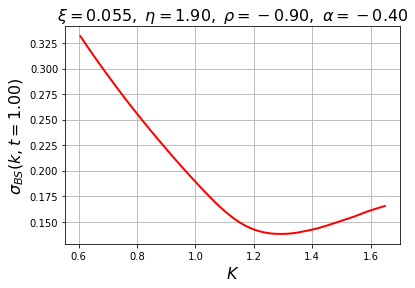

In [48]:
ST = S[:,-1][:,np.newaxis]
K = np.exp(k)[np.newaxis,:]
print(K.shape)
call_payoffs = np.maximum(ST - K,0)

call_prices = np.mean(call_payoffs, axis = 0)[:,np.newaxis]
print(call_prices.shape)
implied_vols = vec_bsinv(call_prices, 1., np.transpose(K), rB.T)
print(implied_vols.shape)

plot, axes = plt.subplots()
axes.plot(K.T,implied_vols, 'r', lw=2)
axes.set_xlabel(r'$K$', fontsize=16)
axes.set_ylabel(r'$\sigma_{BS}(k,t=%.2f)$'%rB.T, fontsize=16)
title = r'$\xi=%.3f,\ \eta=%.2f,\ \rho=%.2f,\ \alpha=%.2f $'
axes.set_title(title%(rB.xi, rB.eta, rB.rho, rB.a), fontsize=16)
plt.grid(True)